# EDA

In [179]:
import pandas as pd
import random
import numpy as np

In [180]:
df = pd.read_csv("ecommerce_customer_data_large.csv")

In [181]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


### Informações gerais

Percebe-se que o dataset possui um conjunto features, mas que possivelmente não será o suficiente para a solução que desejo implementar.
 - Todas as colunas estão 100% preenchidas
 - Os valores de "Customer Age" e de "Age" são idênticos
 - Após pesquisa descobri que o termo "churn" é usado para clientes que deixaram de ser recorrentes
 - Os valores de "Returns" e "Churn" são binários
 - Temos somente a categoria do produto, não o item propriamente dito

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [183]:
df.nunique()

Customer ID               49661
Purchase Date            249728
Product Category              4
Product Price               491
Quantity                      5
Total Purchase Amount      5245
Payment Method                3
Customer Age                 53
Returns                       2
Customer Name             39878
Age                          53
Gender                        2
Churn                         2
dtype: int64

array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Product Price'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Total Purchase Amount'}>,
        <Axes: title={'center': 'Customer Age'}>,
        <Axes: title={'center': 'Returns'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Churn'}>, <Axes: >]], dtype=object)

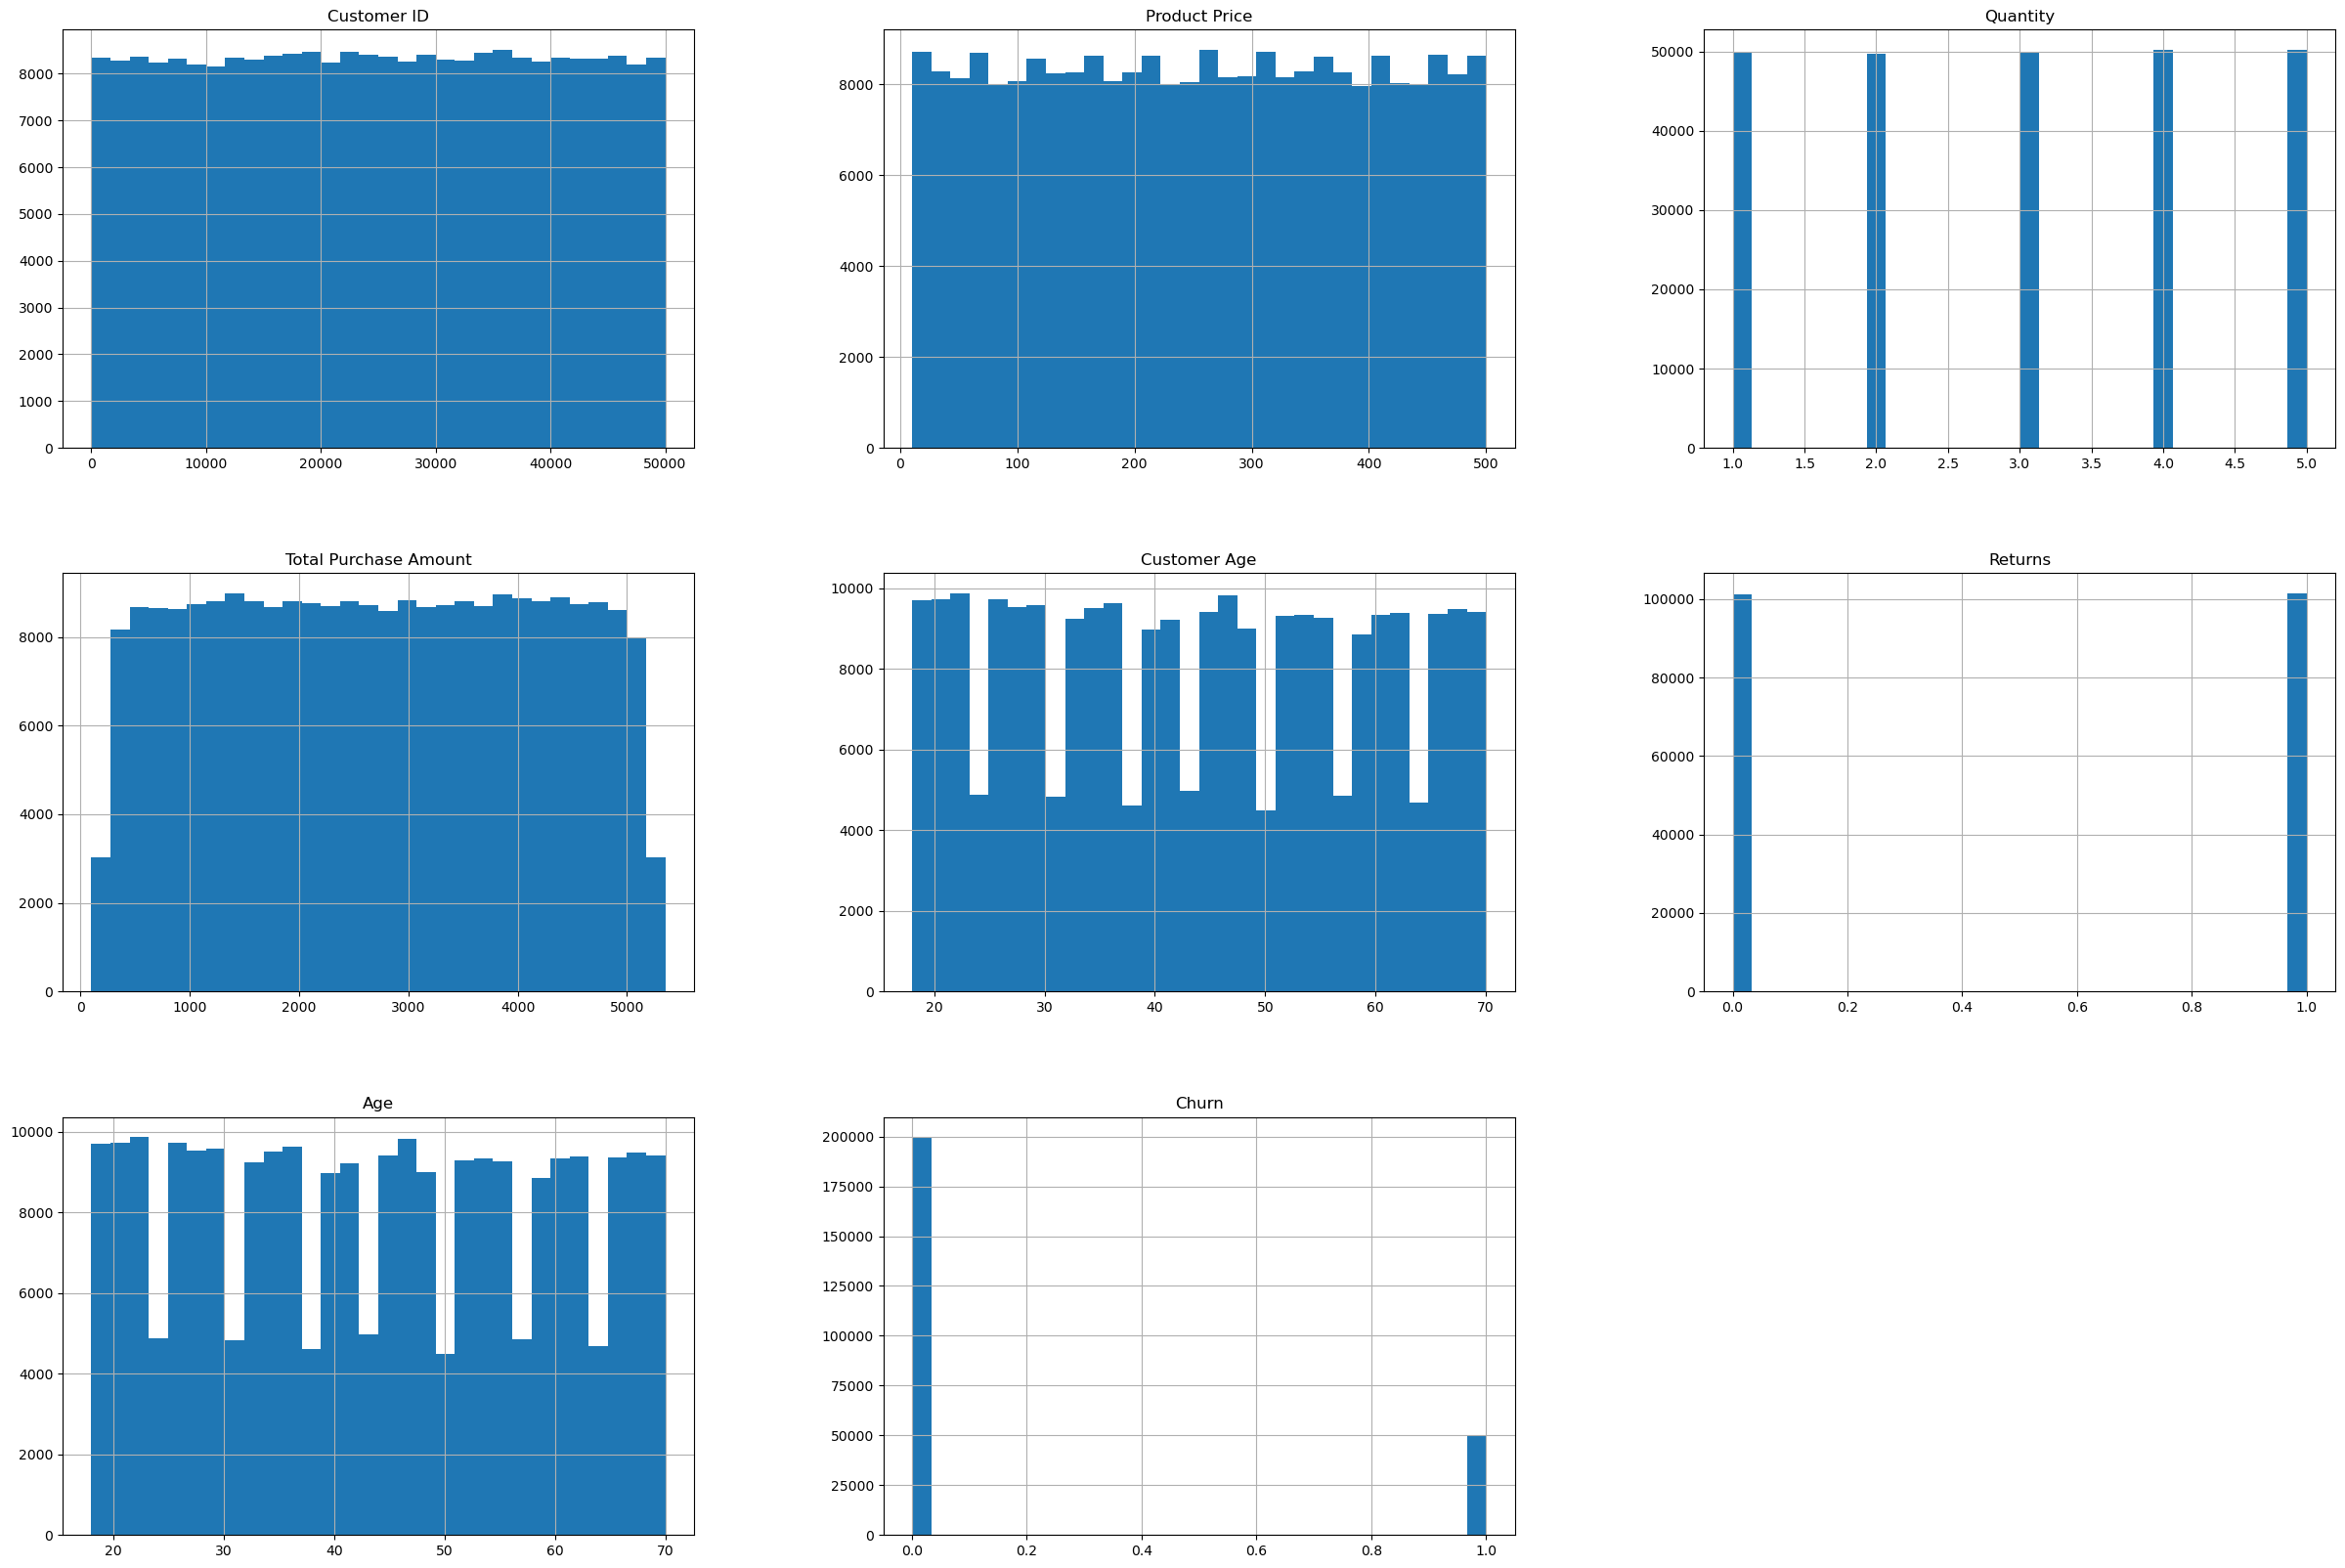

In [184]:
df.hist(bins=30, figsize=(30,20))

In [185]:
round(df[["Product Price", "Quantity", "Age", "Total Purchase Amount"]].describe())

,Product Price,Quantity,Age,Total Purchase Amount
count,250000.0,250000.0,250000.0,250000.0
mean,255.0,3.0,44.0,2725.0
std,142.0,1.0,15.0,1443.0
min,10.0,1.0,18.0,100.0
25%,132.0,2.0,30.0,1476.0
50%,255.0,3.0,44.0,2725.0
75%,377.0,4.0,57.0,3975.0
max,500.0,5.0,70.0,5350.0


# Feature engineering

In [186]:
# Renomeei as colunas para manipulação mais tranquila
colunas = {
    "Customer ID": "Cliente ID",
    "Purchase Date": "Data de compra",
    "Product Category": "Categoria de produto",
    "Product Price": "Preço do produto",
    "Quantity": "Quantidade",
    "Total Purchase Amount": "Valor total",
    "Payment Method": "Método de pagamento",
    "Returns": "Retorno",
    "Customer Name": "Nome cliente",
    "Age": "Idade",
    "Gender": "Gênero",
    "Churn": "Churn"
}
df.rename(columns=colunas,inplace=True)

In [187]:
categorias_traduzidas = {
    "Electronics": "Eletrônicos",
    "Clothing": "Vestuário",
    "Home": "Casa",
    "Beauty": "Beleza",
    "Books": "Livros",
    "Sports": "Esportes"
}

if df['Categoria de produto'].iloc[0] in categorias_traduzidas.keys():
    df['Categoria de produto'] = df['Categoria de produto'].replace(categorias_traduzidas)


In [188]:
# Criar produtos sintéticos por categoria
produtos_sinteticos = {
    'Eletrônicos': ['Notebook X200', 'Smartphone Y10', 'Tablet ZLite', 'Fone Pro Max'],
    'Vestuário': ['Camiseta DryFit', 'Tênis Corrida Pro', 'Calça Jeans Slim', 'Jaqueta WindBreaker'],
    'Casa': ['Panela Antiaderente', 'Conjunto de Copos Luxo', 'Jogo de Cama Queen', 'Abajur Moderno'],
    'Beleza': ['Perfume Intense', 'Kit Maquiagem Pro', 'Creme Facial Renew', 'Shampoo Revitalizante'],
    'Livros': ['Livro de Mistério A1', 'Romance Épico B2', 'Guia de Programação C3', 'HQ Super-Hero D4'],
    'Esportes': ['Bola Oficial', 'Camisa Time X', 'Suplemento Proteico', 'Raquete Tênis Pro']
}


In [189]:
random.seed(42)
def gerar_produto(categoria):
    produtos = produtos_sinteticos.get(categoria, ['Produto Genérico'])
    return random.choice(produtos)

In [190]:
if 'Produto' not in df.columns:
    df['Produto'] = df['Categoria de produto'].apply(gerar_produto)

In [191]:
df.head(1)

,Cliente ID,Data de compra,Categoria de produto,Preço do produto,Quantidade,Valor total,Método de pagamento,Customer Age,Retorno,Nome cliente,Idade,Gênero,Churn,Produto
0,44605,2023-05-03 21:30:02,Casa,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,Panela Antiaderente


In [192]:
df['Data de compra'] = pd.to_datetime(df['Data de compra'])
data_max = df['Data de compra'].max()
df['última compra'] = (data_max - df['Data de compra']).dt.days

In [193]:
data_max

Timestamp('2023-09-13 18:42:49')

In [194]:
df.head(1)

,Cliente ID,Data de compra,Categoria de produto,Preço do produto,Quantidade,Valor total,Método de pagamento,Customer Age,Retorno,Nome cliente,Idade,Gênero,Churn,Produto,última compra
0,44605,2023-05-03 21:30:02,Casa,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,Panela Antiaderente,132


## Recência, frequência e valor monetário

Recência = Mede quantos dias se passaram desde a última transação. \
Frequência = Conta o número de compras feitas em um período. \
valor monetário = Soma o total gasto por cliente.

In [195]:
rfm = df.groupby('Cliente ID').agg({
    'Data de compra': lambda x: (data_max - x.max()).days,
    'Cliente ID': 'count',
    'Valor total': 'sum'
}).rename(columns={
    'Data de compra': 'Recência',
    'Cliente ID': 'Frequência',
    'Valor total': 'Monetário'
}).reset_index()

In [196]:
rfm

,Cliente ID,Recência,Frequência,Monetário
0,1,288,3,6290
1,2,72,6,16481
2,3,222,4,9423
3,4,441,5,7826
4,5,424,5,9769
...,...,...,...,...
49656,49996,359,7,24034
49657,49997,388,2,5714
49658,49998,13,10,20495
49659,49999,356,6,14321


## Média de ticket e gasto total por cliente

In [197]:
df['Ticket médio'] = df['Valor total'] / df['Quantidade']

In [198]:
df.head(1)

,Cliente ID,Data de compra,Categoria de produto,Preço do produto,Quantidade,Valor total,Método de pagamento,Customer Age,Retorno,Nome cliente,Idade,Gênero,Churn,Produto,última compra,Ticket médio
0,44605,2023-05-03 21:30:02,Casa,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,Panela Antiaderente,132,2427.0


In [199]:
gasto_total = df.groupby('Cliente ID')['Valor total'].sum().reset_index(name='Gasto total')

In [200]:
gasto_total

,Cliente ID,Gasto total
0,1,6290
1,2,16481
2,3,9423
3,4,7826
4,5,9769
...,...,...
49656,49996,24034
49657,49997,5714
49658,49998,20495
49659,49999,14321


## Diversidade de produtos

In [201]:
diversidade_produto = df.groupby('Cliente ID')['Categoria de produto'].nunique().reset_index(name='Diversidade de produtos')

In [202]:
diversidade_produto

,Cliente ID,Diversidade de produtos
0,1,3
1,2,4
2,3,3
3,4,4
4,5,2
...,...,...
49656,49996,3
49657,49997,2
49658,49998,3
49659,49999,4


## Retornos

In [203]:
retornos = df.groupby('Cliente ID')['Retorno'].sum().reset_index(name='Total de retornos')

In [204]:
retornos

,Cliente ID,Total de retornos
0,1,0.0
1,2,4.0
2,3,0.0
3,4,3.0
4,5,3.0
...,...,...
49656,49996,2.0
49657,49997,0.0
49658,49998,6.0
49659,49999,3.0


In [205]:
pedidos = df.groupby('Cliente ID').size().reset_index(name='Total de pedidos')

In [206]:
pedidos

,Cliente ID,Total de pedidos
0,1,3
1,2,6
2,3,4
3,4,5
4,5,5
...,...,...
49656,49996,7
49657,49997,2
49658,49998,10
49659,49999,6


In [207]:
taxa_retorno = pd.merge(retornos, pedidos, on='Cliente ID')
taxa_retorno['Taxa de retorno'] = taxa_retorno['Total de retornos'] / taxa_retorno['Total de pedidos']

In [208]:
taxa_retorno

,Cliente ID,Total de retornos,Total de pedidos,Taxa de retorno
0,1,0.0,3,0.000000
1,2,4.0,6,0.666667
2,3,0.0,4,0.000000
3,4,3.0,5,0.600000
4,5,3.0,5,0.600000
...,...,...,...,...
49656,49996,2.0,7,0.285714
49657,49997,0.0,2,0.000000
49658,49998,6.0,10,0.600000
49659,49999,3.0,6,0.500000


## Probabilidade de usar cupom

In [209]:
df['Provável uso de cupom'] = ((df['Preço do produto'] < df['Preço do produto'].quantile(0.25)) & 
                               (df['Quantidade'] > df['Quantidade'].median())).astype(int)

In [210]:
df.head(1)

,Cliente ID,Data de compra,Categoria de produto,Preço do produto,Quantidade,Valor total,Método de pagamento,Customer Age,Retorno,Nome cliente,Idade,Gênero,Churn,Produto,última compra,Ticket médio,Provável uso de cupom
0,44605,2023-05-03 21:30:02,Casa,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,Panela Antiaderente,132,2427.0,0


## Segmentação por faixa etária

In [211]:
faixas = [0, 24, 34, 44, 54, 64, 120]
faixas_rotulos = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Faixa etária'] = pd.cut(df['Idade'], bins=faixas, labels=faixas_rotulos, right=False)

In [212]:
df.head(1)

,Cliente ID,Data de compra,Categoria de produto,Preço do produto,Quantidade,Valor total,Método de pagamento,Customer Age,Retorno,Nome cliente,Idade,Gênero,Churn,Produto,última compra,Ticket médio,Provável uso de cupom,Faixa etária
0,44605,2023-05-03 21:30:02,Casa,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,Panela Antiaderente,132,2427.0,0,25-34


## Clientes de alto valor

In [213]:
top_25 = gasto_total['Gasto total'].quantile(0.75)
gasto_total['Cliente alto valor'] = (gasto_total['Gasto total'] > top_25).astype(int)

In [214]:
gasto_total

,Cliente ID,Gasto total,Cliente alto valor
0,1,6290,0
1,2,16481,0
2,3,9423,0
3,4,7826,0
4,5,9769,0
...,...,...,...
49656,49996,24034,1
49657,49997,5714,0
49658,49998,20495,1
49659,49999,14321,0


## Sazonalidade

In [215]:
df['Mês da compra'] = df['Data de compra'].dt.month
estacoes = {
    (12, 1, 2): 'Verão',
    (3, 4, 5): 'Outono',
    (6, 7, 8): 'Inverno',
    (9, 10, 11): 'Primavera'
}

In [216]:
def identificar_estacao(mes):
    for meses, estacao in estacoes.items():
        if mes in meses:
            return estacao
    return 'Desconhecido'

In [217]:
df['Estação da compra'] = df['Mês da compra'].apply(identificar_estacao)

In [218]:
df.head(1)

,Cliente ID,Data de compra,Categoria de produto,Preço do produto,Quantidade,Valor total,Método de pagamento,Customer Age,Retorno,Nome cliente,Idade,Gênero,Churn,Produto,última compra,Ticket médio,Provável uso de cupom,Faixa etária,Mês da compra,Estação da compra
0,44605,2023-05-03 21:30:02,Casa,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,Panela Antiaderente,132,2427.0,0,25-34,5,Outono


## Método de pagamento preferido

In [219]:
pagamento_preferido = df.groupby(['Cliente ID', 'Método de pagamento']).size().reset_index(name='contagem')

In [220]:
pagamento_preferido = pagamento_preferido.sort_values('contagem', ascending=False).drop_duplicates('Cliente ID')

In [221]:
pagamento_preferido = pagamento_preferido[['Cliente ID', 'Método de pagamento']].rename(columns={'Método de pagamento': 'Pagamento preferido'})

In [222]:
pagamento_preferido

,Cliente ID,Pagamento preferido
85713,35294,Credit Card
21303,8770,Credit Card
113216,46593,Credit Card
59732,24568,PayPal
51812,21330,Cash
...,...,...
58301,23979,Credit Card
58321,23988,Cash
58358,24002,Cash
58363,24004,Credit Card


## Consolidar dataset final

In [223]:
dataset_final = df.merge(rfm, on='Cliente ID') \
                  .merge(gasto_total, on='Cliente ID') \
                  .merge(diversidade_produto, on='Cliente ID') \
                  .merge(taxa_retorno[['Cliente ID', 'Taxa de retorno']], on='Cliente ID') \
                  .merge(pagamento_preferido, on='Cliente ID', how='left')

In [224]:
dataset_final

,Cliente ID,Data de compra,Categoria de produto,Preço do produto,Quantidade,Valor total,Método de pagamento,Customer Age,Retorno,Nome cliente,...,Mês da compra,Estação da compra,Recência,Frequência,Monetário,Gasto total,Cliente alto valor,Diversidade de produtos,Taxa de retorno,Pagamento preferido
0,44605,2023-05-03 21:30:02,Casa,177,1,2427,PayPal,31,1.0,John Rivera,...,5,Outono,132,5,10755,10755,0,3,0.8,PayPal
1,44605,2021-05-16 13:57:44,Eletrônicos,174,3,2448,PayPal,31,1.0,John Rivera,...,5,Outono,132,5,10755,10755,0,3,0.8,PayPal
2,44605,2020-07-13 06:16:57,Livros,413,1,2345,Credit Card,31,1.0,John Rivera,...,7,Inverno,132,5,10755,10755,0,3,0.8,PayPal
3,44605,2023-01-17 13:14:36,Eletrônicos,396,3,937,Cash,31,0.0,John Rivera,...,1,Verão,132,5,10755,10755,0,3,0.8,PayPal
4,44605,2021-05-01 11:29:27,Livros,259,4,2598,PayPal,31,1.0,John Rivera,...,5,Outono,132,5,10755,10755,0,3,0.8,PayPal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Casa,436,1,3664,Cash,63,0.0,Gabriel Williams,...,1,Verão,232,1,3664,3664,0,1,0.0,Cash
249996,20455,2021-06-04 05:45:25,Eletrônicos,233,1,4374,Credit Card,66,1.0,Barry Foster,...,6,Inverno,831,1,4374,4374,0,1,1.0,Credit Card
249997,28055,2022-11-10 17:11:57,Eletrônicos,441,5,5296,Cash,63,NaN,Lisa Johnson,...,11,Primavera,307,1,5296,5296,0,1,0.0,Cash
249998,15023,2021-06-27 14:42:12,Eletrônicos,44,2,2517,Cash,64,1.0,Melissa Fernandez,...,6,Inverno,808,1,2517,2517,0,1,1.0,Cash


In [225]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Cliente ID               250000 non-null  int64         
 1   Data de compra           250000 non-null  datetime64[ns]
 2   Categoria de produto     250000 non-null  object        
 3   Preço do produto         250000 non-null  int64         
 4   Quantidade               250000 non-null  int64         
 5   Valor total              250000 non-null  int64         
 6   Método de pagamento      250000 non-null  object        
 7   Customer Age             250000 non-null  int64         
 8   Retorno                  202618 non-null  float64       
 9   Nome cliente             250000 non-null  object        
 10  Idade                    250000 non-null  int64         
 11  Gênero                   250000 non-null  object        
 12  Churn           

In [226]:
dataset_final.to_csv("dataset_enriquecido.csv", index=False)

# Treinamento

O modelo utilizado será o kmeans (até então)

Minhas features são:
- Perfil demográfico (Idade, Gênero, Faixa etária)
- Perfil financeiro (Ticket médio, Gasto total, Monetário)
- Comportamento (Frequência, Recência, Churn, Retorno, Provável uso de cupom)
- Preferência de compra (Categoria de produto, Produto, Diversidade de produtos, Método de pagamento preferido)
- Sazonalidade (Mês da compra, Estação da compra)

O objetivo é conseguir criar clusters de clientes para poder fazer recomendações de produtos nos produtos mais comprados pelo seu cluster


In [227]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score,silhouette_samples, calinski_harabasz_score, davies_bouldin_score
import joblib
import plotly.graph_objects as go
import plotly.express as px

In [228]:
df_treinamento = pd.read_csv("dataset_enriquecido.csv")

In [229]:
df_treinamento.columns

Index(['Cliente ID', 'Data de compra', 'Categoria de produto',
       'Preço do produto', 'Quantidade', 'Valor total', 'Método de pagamento',
       'Customer Age', 'Retorno', 'Nome cliente', 'Idade', 'Gênero', 'Churn',
       'Produto', 'última compra', 'Ticket médio', 'Provável uso de cupom',
       'Faixa etária', 'Mês da compra', 'Estação da compra', 'Recência',
       'Frequência', 'Monetário', 'Gasto total', 'Cliente alto valor',
       'Diversidade de produtos', 'Taxa de retorno', 'Pagamento preferido'],
      dtype='object')

In [230]:
# Primeiro teste de features para treino
features = [
    'Idade',
    'Recência',
    'Frequência',
    'Monetário',
    'Gasto total',
    'Diversidade de produtos',
    'Taxa de retorno',
    'Produto',
    'Gênero',
    'Pagamento preferido'
]

In [231]:
# Tratando campos vazios
X = df_treinamento[features].copy()
X['Taxa de retorno'] = X['Taxa de retorno'].fillna(0)
X['Produto'] = X['Produto'].fillna('Desconhecido')
X['Gênero'] = X['Gênero'].fillna('Outro')
X['Pagamento preferido'] = X['Pagamento preferido'].fillna('Outro')


In [232]:
X

,Idade,Recência,Frequência,Monetário,Gasto total,Diversidade de produtos,Taxa de retorno,Produto,Gênero,Pagamento preferido
0,31,132,5,10755,10755,3,0.8,Panela Antiaderente,Female,PayPal
1,31,132,5,10755,10755,3,0.8,Notebook X200,Female,PayPal
2,31,132,5,10755,10755,3,0.8,Guia de Programação C3,Female,PayPal
3,31,132,5,10755,10755,3,0.8,Smartphone Y10,Female,PayPal
4,31,132,5,10755,10755,3,0.8,Romance Épico B2,Female,PayPal
...,...,...,...,...,...,...,...,...,...,...
249995,63,232,1,3664,3664,1,0.0,Conjunto de Copos Luxo,Male,Cash
249996,66,831,1,4374,4374,1,1.0,Notebook X200,Female,Credit Card
249997,63,307,1,5296,5296,1,0.0,Tablet ZLite,Female,Cash
249998,64,808,1,2517,2517,1,1.0,Fone Pro Max,Male,Cash


In [233]:
# Divisão de features numéricas e categóricas
num_features = [
    'Idade', 'Recência', 'Frequência', 'Monetário', 'Gasto total', 'Diversidade de produtos', 'Taxa de retorno'
]
cat_features = ['Produto', 'Gênero', 'Pagamento preferido']

In [234]:
# Pré-processamento usando OneHotEncoder e StandardScaler
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

In [235]:
# Pipeline final, teste com 5 clusters
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('cluster', KMeans(n_clusters=5, random_state=42, n_init='auto'))
])

In [255]:
# Treinamento
pipeline.fit(X)
df_treinamento['Cluster'] = pipeline.predict(X)
joblib.dump(pipeline, 'modelo_cluster.pkl')

['modelo_cluster.pkl']

In [237]:
df_treinamento.head()

,Cliente ID,Data de compra,Categoria de produto,Preço do produto,Quantidade,Valor total,Método de pagamento,Customer Age,Retorno,Nome cliente,...,Estação da compra,Recência,Frequência,Monetário,Gasto total,Cliente alto valor,Diversidade de produtos,Taxa de retorno,Pagamento preferido,Cluster
0,44605,2023-05-03 21:30:02,Casa,177,1,2427,PayPal,31,1.0,John Rivera,...,Outono,132,5,10755,10755,0,3,0.8,PayPal,1
1,44605,2021-05-16 13:57:44,Eletrônicos,174,3,2448,PayPal,31,1.0,John Rivera,...,Outono,132,5,10755,10755,0,3,0.8,PayPal,1
2,44605,2020-07-13 06:16:57,Livros,413,1,2345,Credit Card,31,1.0,John Rivera,...,Inverno,132,5,10755,10755,0,3,0.8,PayPal,1
3,44605,2023-01-17 13:14:36,Eletrônicos,396,3,937,Cash,31,0.0,John Rivera,...,Verão,132,5,10755,10755,0,3,0.8,PayPal,1
4,44605,2021-05-01 11:29:27,Livros,259,4,2598,PayPal,31,1.0,John Rivera,...,Outono,132,5,10755,10755,0,3,0.8,PayPal,1


In [238]:
df_treinamento.groupby("Cliente ID")["Cluster"].first().reset_index()

,Cliente ID,Cluster
0,1,1
1,2,4
2,3,1
3,4,4
4,5,1
...,...,...
49656,49996,0
49657,49997,3
49658,49998,0
49659,49999,2


# Métricas do treino

## silhouette

In [239]:
X_processed = pipeline.named_steps['preprocessor'].transform(X)
labels = df_treinamento['Cluster']

In [240]:
sil_score = silhouette_score(X_processed, labels)

In [241]:
silhouette_vals = silhouette_samples(X_processed, labels)
n_clusters = np.unique(labels).shape[0]

fig = go.Figure()
y_lower = 0

for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    fig.add_trace(go.Bar(
        x=ith_cluster_silhouette_values,
        y=np.arange(y_lower, y_upper),
        orientation='h',
        name=f'Cluster {i}',
        marker_color=px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)]
    ))

    y_lower = y_upper + 10

fig.add_vline(x=sil_score, line_dash="dash", line_color="red")
fig.update_layout(
    title="Gráfico do Silhouette para Clusters",
    xaxis_title="Coeficiente de Silhouette",
    yaxis_title="",
    showlegend=True,
    height=600
)
fig.write_html("grafico_silhouette_plotly.html")


## Inertia

In [242]:
inertia = pipeline.named_steps['cluster'].inertia_

In [243]:
inertias = []
k_values = list(range(2, 11))

for k in k_values:
    kmeans = Pipeline([
        ('preprocessor', preprocessor),
        ('cluster', KMeans(n_clusters=k, random_state=42, n_init='auto'))
    ])
    kmeans.fit(X)
    inertia = kmeans.named_steps['cluster'].inertia_
    inertias.append(inertia)

fig_elbow = go.Figure()
fig_elbow.add_trace(go.Scatter(x=k_values, y=inertias, mode='lines+markers', marker=dict(size=8)))
fig_elbow.update_layout(
    title='Método do Cotovelo (Inertia vs Número de Clusters)',
    xaxis_title='Número de Clusters (k)',
    yaxis_title='Inertia',
    height=500
)
fig_elbow.write_html("grafico_cotovelo_plotly.html")

# Outras métricas

In [244]:
ch_score = calinski_harabasz_score(X_processed, labels)

In [245]:
db_score = davies_bouldin_score(X_processed, labels)

# Resolução

In [246]:
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Calinski-Harabasz Index: {ch_score:.2f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")

Inertia: 1176707.68
Silhouette Score: 0.1138
Calinski-Harabasz Index: 40147.70
Davies-Bouldin Index: 2.1432


- Inertia	1.385.768,56    |  ✅ Ok (usada só no cotovelo)
- Silhouette Score	0.1138  |   ⚠️ Baixo (ideal > 0.25)
- Calinski-Harabasz	40.147,70   |   ✅ Alto
- Davies-Bouldin	2.1432  |   ⚠️ Poderia ser menor (<2 ideal)

In [248]:
perfil_produtos = df_treinamento.groupby(['Cluster', 'Produto']).size().reset_index(name='Frequencia')

In [249]:
perfil_produtos

,Cluster,Produto,Frequencia
0,0,Abajur Moderno,2807
1,0,Calça Jeans Slim,2798
2,0,Camiseta DryFit,2799
3,0,Conjunto de Copos Luxo,2830
4,0,Fone Pro Max,2799
...,...,...,...
75,4,Panela Antiaderente,3987
76,4,Romance Épico B2,3940
77,4,Smartphone Y10,3961
78,4,Tablet ZLite,3958


In [254]:
perfil_produtos[perfil_produtos['Cluster'] == 0].sort_values('Frequencia', ascending=False)

,Cluster,Produto,Frequencia
13,0,Smartphone Y10,2887
7,0,Jaqueta WindBreaker,2870
6,0,HQ Super-Hero D4,2866
3,0,Conjunto de Copos Luxo,2830
5,0,Guia de Programação C3,2828
8,0,Jogo de Cama Queen,2825
0,0,Abajur Moderno,2807
9,0,Livro de Mistério A1,2804
10,0,Notebook X200,2800
2,0,Camiseta DryFit,2799


In [250]:
perfil_produtos.to_excel("perfil_produtos_por_cluster.xlsx", index=False)